In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H863QRpDkhfsSGPwkDlE")
project = rf.workspace("lalala-lp7pm").project("mask-detection-2dcrj")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!nvidia-smi

Tue Aug  5 14:20:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.5/112.6 GB disk)


In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/Mask-detection-1/train/images/106354385-1579893252781rts2zlfe_jpg.rf.e5357710fed7da2be80c9601fa7783ec.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 70.3MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/Mask-detection-1/train/images/106354385-1579893252781rts2zlfe_jpg.rf.e5357710fed7da2be80c9601fa7783ec.jpg: 640x640 7 persons, 8.6ms
Speed: 7.7ms preprocess, 8.6ms inference, 330.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


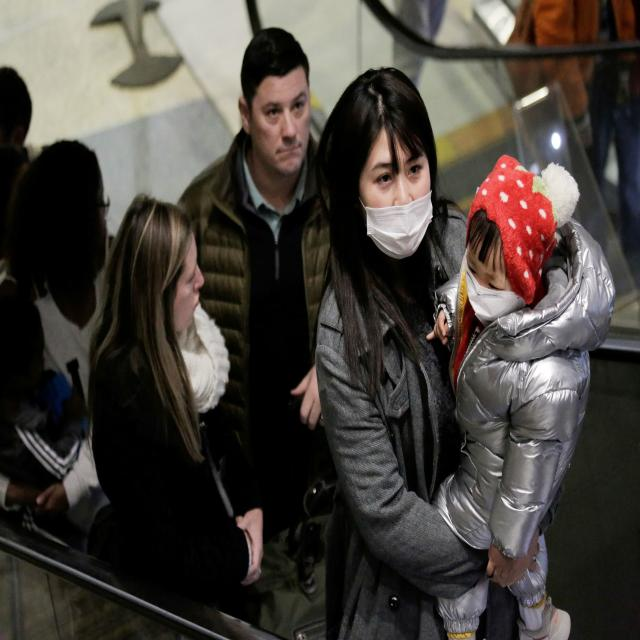

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/Mask-detection-1/train/images/106354385-1579893252781rts2zlfe_jpg.rf.e5357710fed7da2be80c9601fa7783ec.jpg', width=600)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open('/content/Mask-detection-1/train/images/106354385-1579893252781rts2zlfe_jpg.rf.e5357710fed7da2be80c9601fa7783ec.jpg')
result = model.predict(image, conf=0.25)[0]


0: 640x640 7 persons, 16.7ms
Speed: 4.7ms preprocess, 16.7ms inference, 184.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
result.boxes.xyxy

tensor([[8.3422e+01, 1.9383e+02, 2.6329e+02, 6.1292e+02],
        [1.7920e+02, 2.6582e+01, 3.3336e+02, 6.3359e+02],
        [3.3022e-01, 1.3991e+02, 1.1259e+02, 5.4281e+02],
        [3.0091e+02, 6.6794e+01, 4.9117e+02, 6.3855e+02],
        [4.4544e+02, 1.5346e+02, 6.1580e+02, 6.3797e+02],
        [1.6238e-01, 6.6350e+01, 3.3018e+01, 2.5855e+02],
        [3.0091e+02, 6.2075e+01, 6.1519e+02, 6.4000e+02]], device='cuda:0')

In [ ]:
result.boxes.conf


tensor([0.7969, 0.7330, 0.7077, 0.5714, 0.5598, 0.3804, 0.3033], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

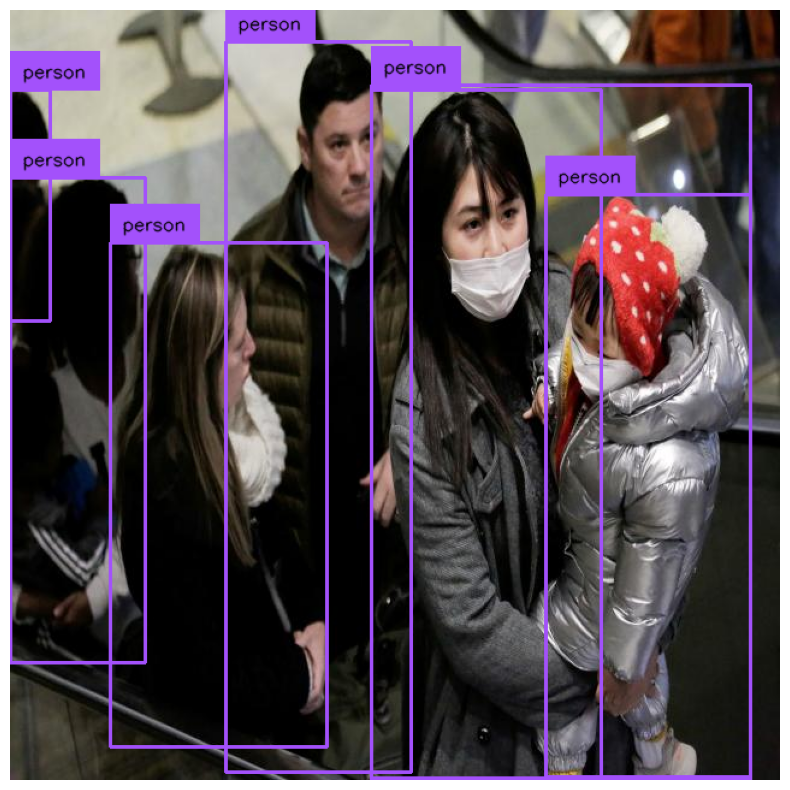

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H863QRpDkhfsSGPwkDlE")
project = rf.workspace("lalala-lp7pm").project("mask-detection-2dcrj")
version = project.version(1)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Mask-detection-1 in yolov11:: 100%|██████████| 1212/1212 [00:00<00:00, 8060.89it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 127MB/s]
New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Mask-detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1754403776.6257eac6064b.1442.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


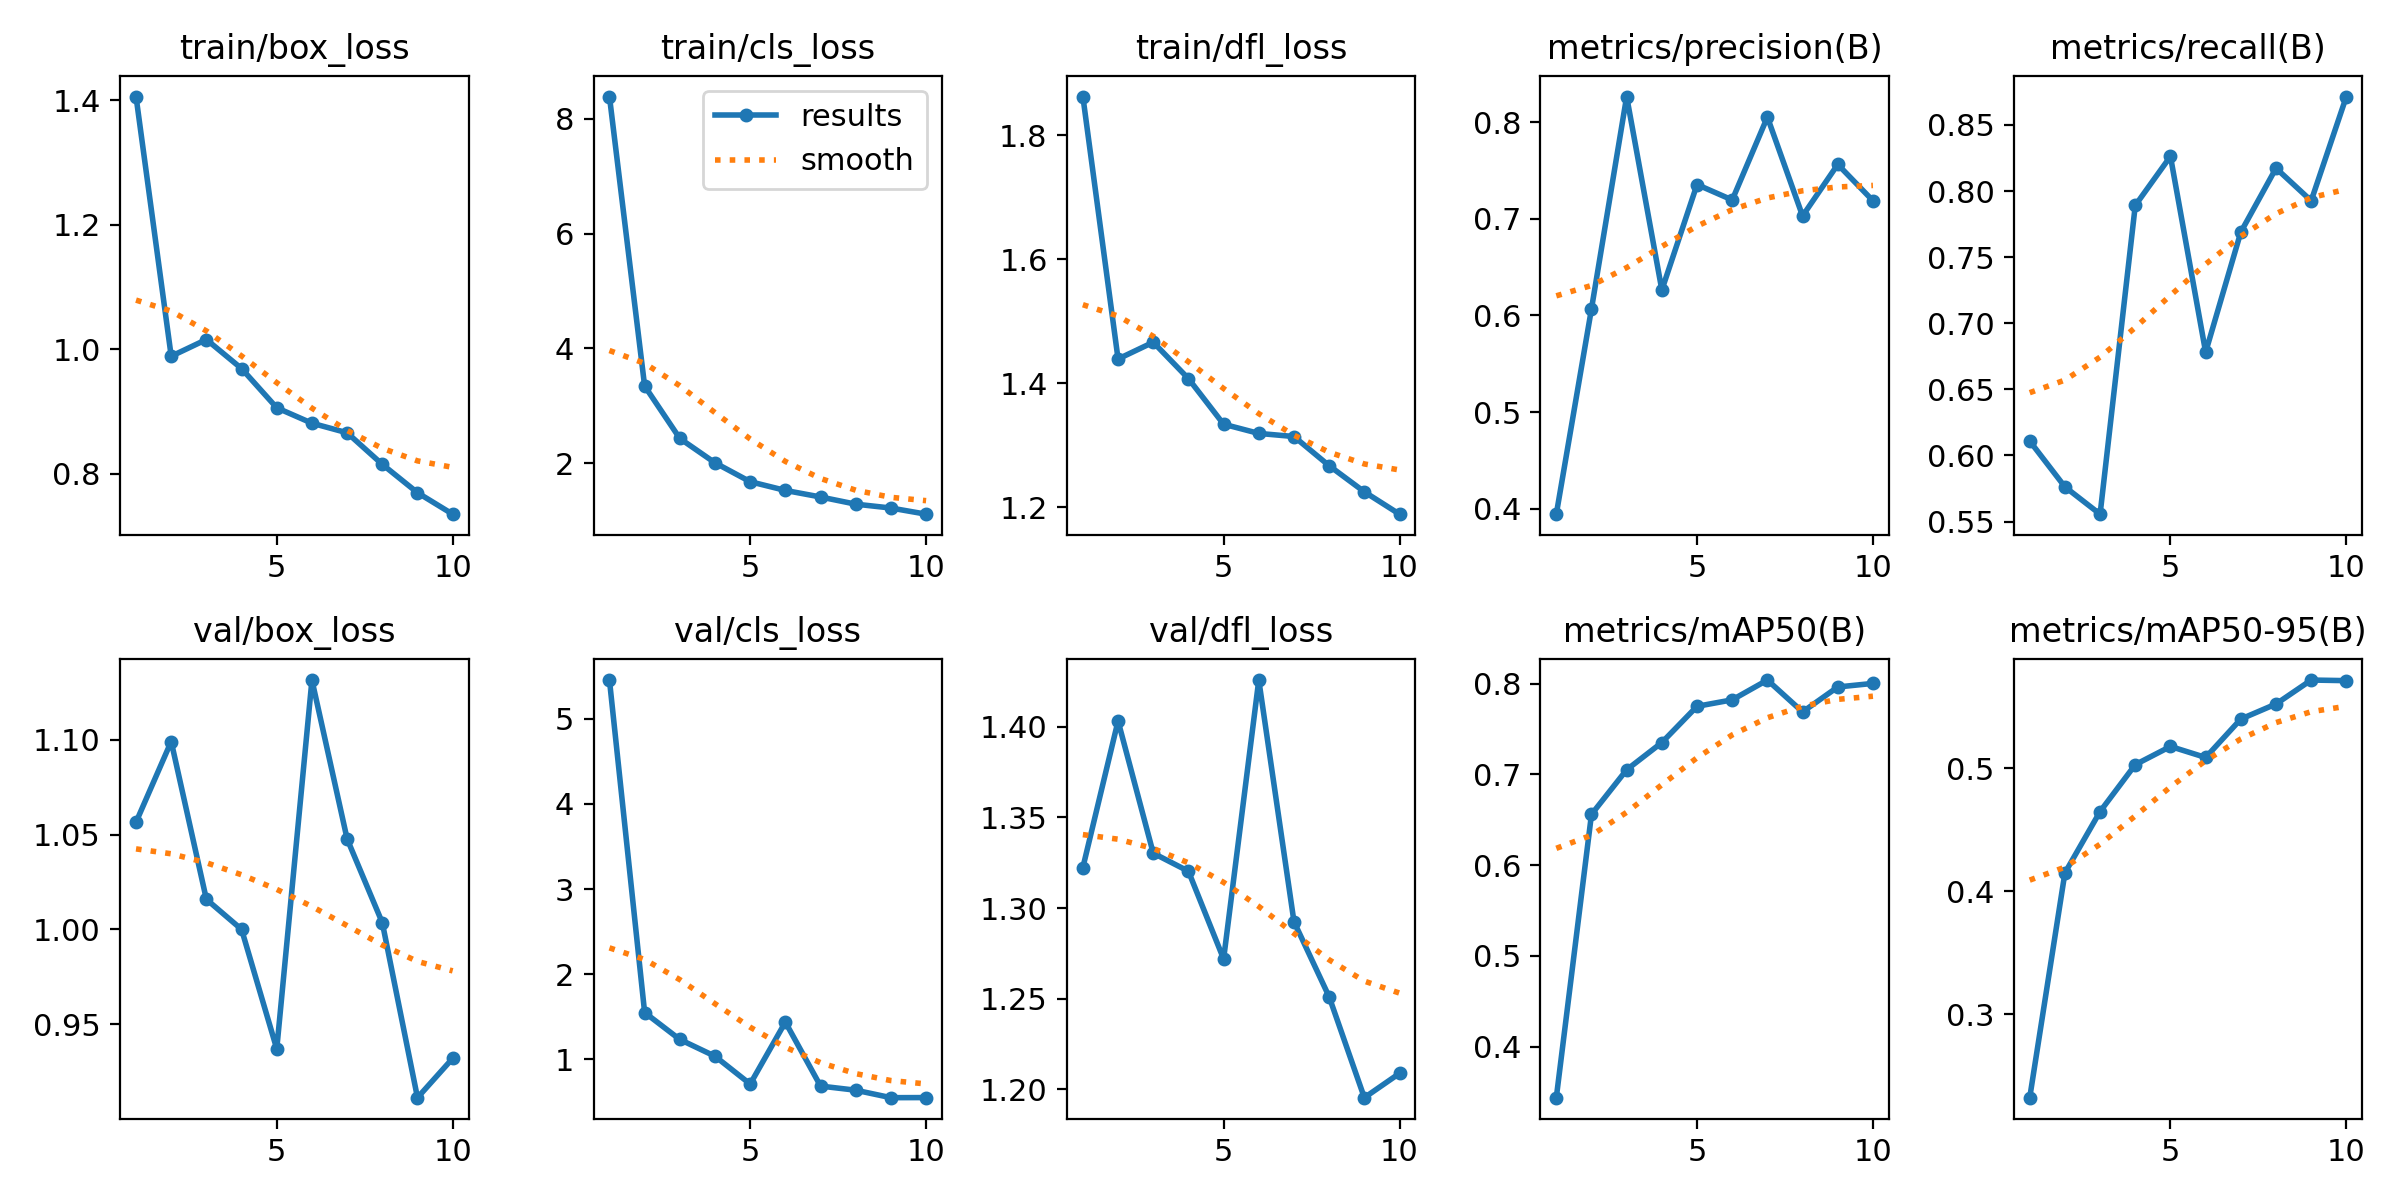

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Mask-detection-1/valid/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  2.13it/s]
                   all         67         83      0.757      0.794      0.796      0.573
                 cloth         18         19      0.976          1      0.995      0.756
                  kn95          9          9      0.947          1      0.995      0.773
 mask_weared_incorrect         13         15      0.663      0.733      0.805      0.406
                   n95         14         14      0.884          1      0.995      0.828
              surgical         13         13      0.956          1      0.995      0.757
             with_mask          6       

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs

image 1/29 /content/datasets/Mask-detection-1/test/images/106959963-1634151315566-gettyimages-1218004444-womanquarantinehomeisolationfacemaskcovid-19coronavirusmdome_jpeg.rf.20099876b2fe5c013e806a44071abe26.jpg: 640x640 1 mask_weared_incorrect, 15.6ms
image 2/29 /content/datasets/Mask-detection-1/test/images/b21f2584-fe04-4cb9-a499-a233c940a0a2-33c3c4d76d1f2ed41f18302ddfe103d1_jpeg.rf.6dad185f8c4a81d217c1a312de1ed067.jpg: 640x640 1 mask_weared_incorrect, 15.7ms
image 3/29 /content/datasets/Mask-detection-1/test/images/fabric-mask-600x430_png.rf.a11f139c1377e01f21fd92672c9a4502.jpg: 640x640 1 mask_weared_incorrect, 15.7ms
image 4/29 /content/datasets/Mask-detection-1/test/images/how-to-wear-face-mask-right-way_jpg.rf.7684d316952edbf04b148b87c639c512.jpg: 640x640 1 mask_weared_incorrect, 15.7ms
image 5/29 /content/datasets/

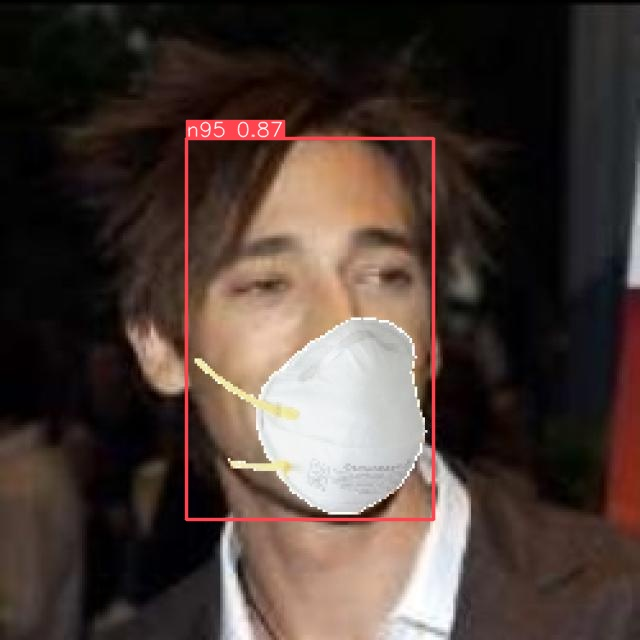

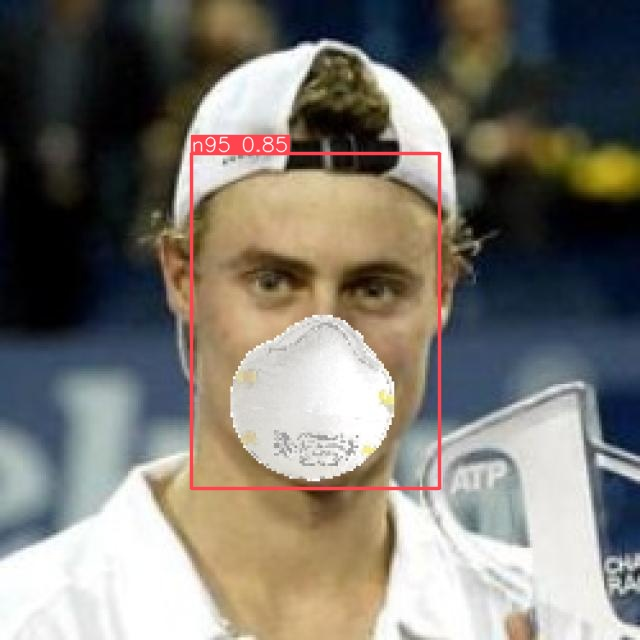

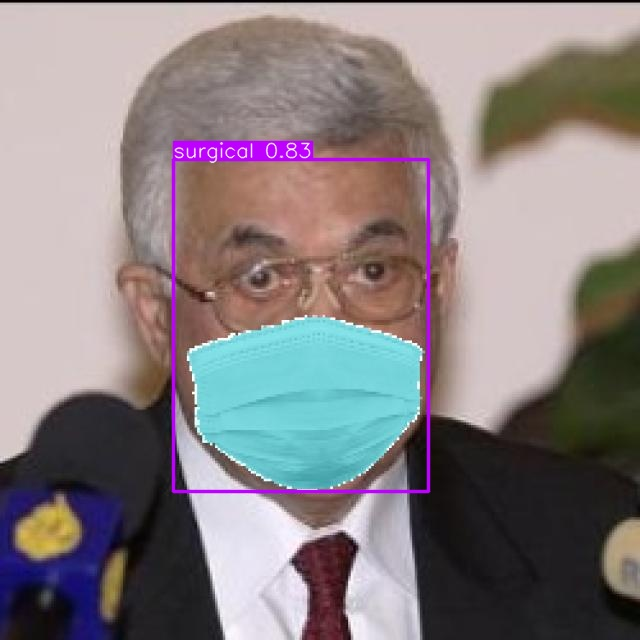

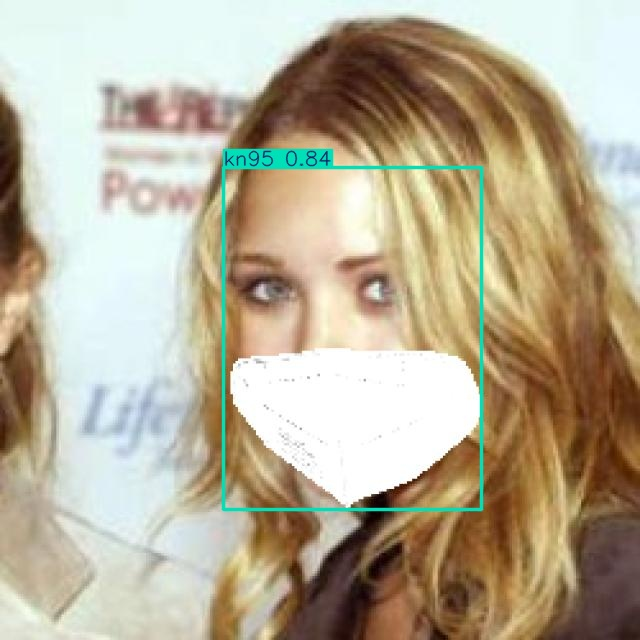

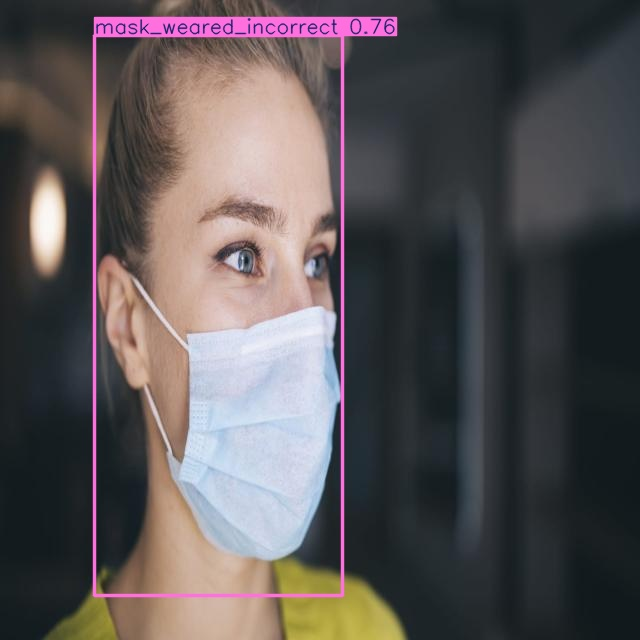

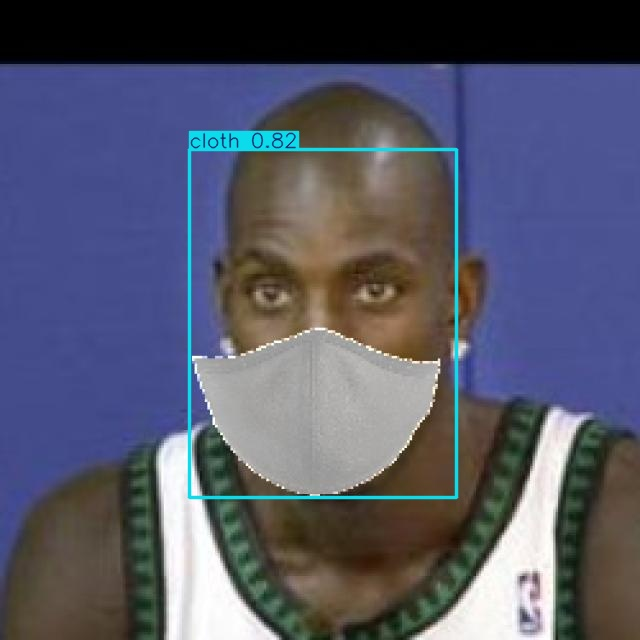

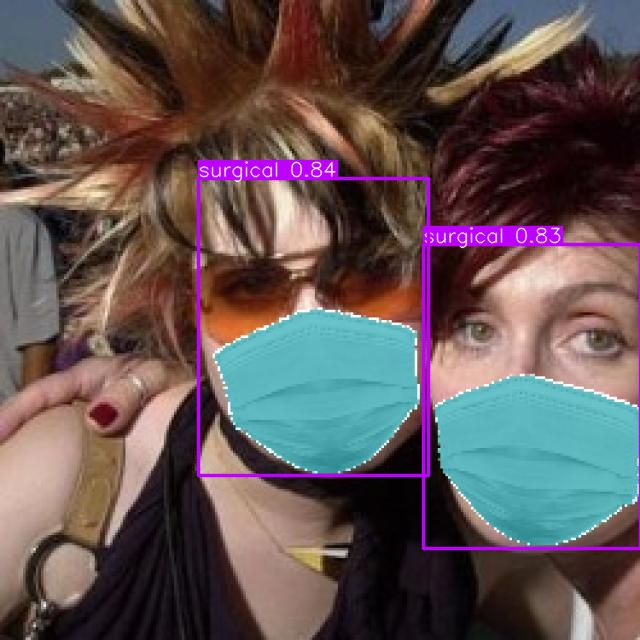

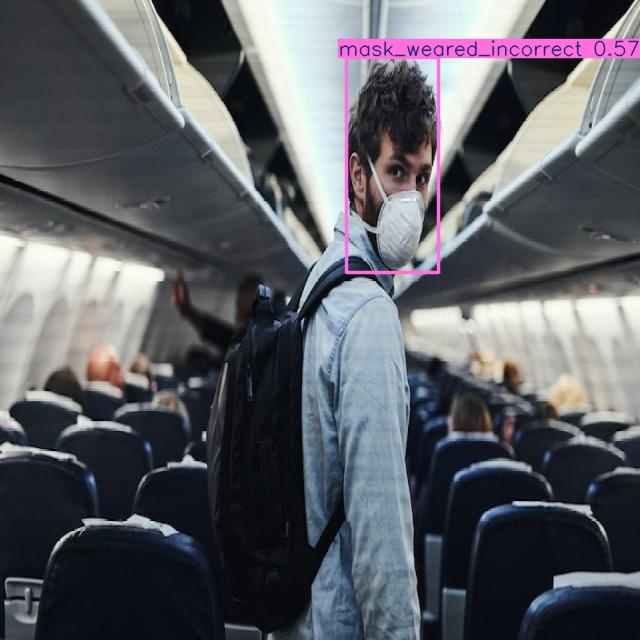

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:8]:
    display(IPyImage(filename=img, width=600))
    print("\n")